<a href="https://colab.research.google.com/github/kiissy/machine-learning/blob/master/assignment_02_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear supervised regression
<hr>

## 0. Import library
<hr>
Import library

In [1]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LinearRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time


## 1. Load dataset
<hr>
Load a set of data pairs $\{ x_i, y_i \}_{i=1}^n$ where $x$ represents label and $y$ represents target.

In [2]:
# import data with numpy
data = np.loadtxt('profit_population.txt', delimiter=',')


## 2. Explore the dataset distribution
<hr>

Plot the training data points.

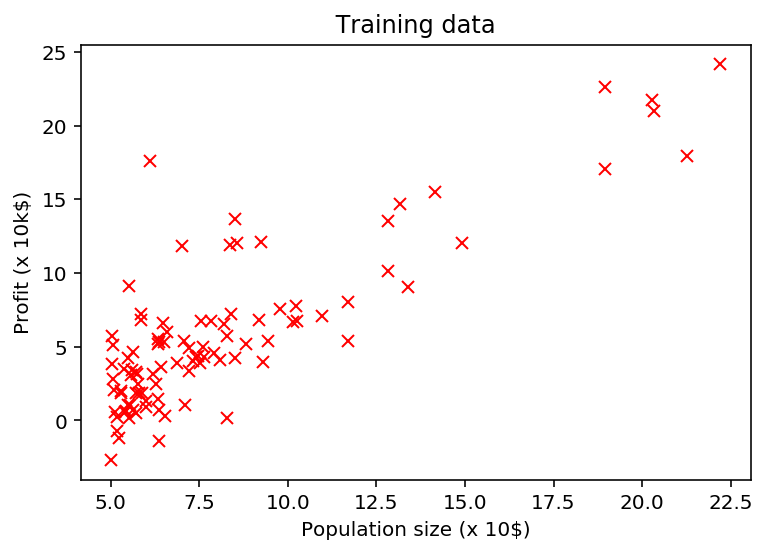

In [14]:
x_train = data[:,0]
y_train = data[:,1]

plt.title(" Training data ")
plt.xlabel("Population size (x 10$)")
plt.ylabel("Profit (x 10k$)")
plt.plot(x_train, y_train, ls="", marker="x", mec="r", mfc="r")
plt.show()

## 3. Define the linear prediction function 
<hr>
$$
f_w(x) = w_0 + w_1 x
$$

### Vectorized implementation:
$$
f_w(x) = X w 
$$
with 
<br>
$$
X = 
\left[ 
\begin{array}{cccc}
1 & x_1 \\ 
1 & x_2 \\ 
\vdots\\
1 & x_n
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 
\end{array} 
\right]
\quad
\Rightarrow 
\quad
f_w(x) = X w  =
\left[ 
\begin{array}{cccc}
w_0 + w_1 x_1 \\ 
w_0 + w_1 x_2 \\ 
\vdots\\
w_0 + w_1 x_n
\end{array} 
\right]
$$

Implement the vectorized version of the linear predictive function.

In [141]:
# construct data matrix
X = np.array([[0, 0]])
for i in range(len(x_train)):
    X = np.append(X, [[1, x_train[i]]], axis=0)
X = np.delete(X, 0, axis=0)
# print(X, type(X))

# parameters vector
w = [1, 1]

# predictive function definition
def f_pred(X,w): 
    
    f = X @ w
    
    return f 

# Test predicitive function 
y_pred = f_pred(X,w)
print(y_pred)

[ 7.1101  6.5277  9.5186  8.0032  6.8598  9.3829  8.4764  9.5781  7.4862
  6.0546  6.7107 15.164   6.734   9.4084  6.6407  6.3794  7.3654  6.1301
  7.4296  8.0708  7.1891 21.27    6.4901  7.3261  6.5649 19.945  13.828
 11.957  14.176  23.203   6.2524  7.5894 10.2482  6.8918  9.2111  8.9334
  9.0959  6.6063 13.836   7.3534  6.4069  7.8825 12.708   6.7737  8.8247
  8.0931  6.0702  6.8014 12.7     6.5416  8.5402  6.3077  8.4239  8.6031
  7.3328  7.3589  7.2742  6.6397 10.3102 10.4536  9.8254  6.1793 22.279
 15.908  19.959   8.2182  9.2951 11.236   6.4994 21.341  11.136   8.3345
  7.0062  8.2259  6.0269  7.5479  8.5386  6.0365 11.274   6.1077  6.7292
  6.1884  7.3557 10.7687  7.5159  9.5172 10.1802  7.002   6.5204  6.0594
  6.7077  8.6366  6.8707  6.3054  9.2934 14.394   6.4369]


## 4. Define the linear regression loss 
<hr>
$$
L(w)=\frac{1}{n} \sum_{i=1}^n \ \Big( f_w(x_i) – y_i \Big)^2
$$

### Vectorized implementation:
$$
L(w)=\frac{1}{n} (Xw-y)^T(Xw-y)
$$
with 
$$
Xw=
\left[ 
\begin{array}{cccc}
w_0 + w_1 x_1 \\ 
w_0 + w_1 x_2 \\ 
\vdots\\
w_0 + w_1 x_n
\end{array} 
\right]
\quad
\textrm{ and }
\quad
y = 
\left[ 
\begin{array}{cccc}
y_1 \\ 
y_2 \\ 
\vdots\\
y_n
\end{array} 
\right]
$$

Implement the vectorized version of the linear regression loss function.

In [63]:
# loss function definition
def loss_mse(y_pred,y): 
    n = len(x_train)
    
    loss = (y_pred - y) @ (y_pred - y).T / n
    
    return loss


# Test loss function 
y = y_train # label 
y_pred = f_pred(X,w)# prediction

loss = loss_mse(y_pred,y)

20.53304098276701


## 5. Define the gradient of the linear regression loss 
<hr>

### Vectorized implementation: Given the loss
$$
L(w)=\frac{1}{n} (Xw-y)^T(Xw-y)
$$
The gradient is given by  
$$
\frac{\partial}{\partial w} L(w) = \frac{2}{n} X^T(Xw-y)
$$


Implement the vectorized version of the gradient of the linear regression loss function.

In [64]:
# gradient function definition
def grad_loss(y_pred,y,X):
    n = len(x_train)
    
    grad = X.T @ (y_pred - y) * 2 / n

    return grad


# Test grad function 
y_pred = f_pred(X,w)
grad = grad_loss(y_pred,y,X)

[ 6.6413299  48.46978615]


## 6. Implement the gradient descent algorithm 
<hr>

$\bullet$ Vectorized implementation: 
$$
w^{k+1} = w^{k} - \tau  \frac{2}{n} X^T(Xw^{k}-y)
$$

### Implement the vectorized version of the gradient descent function.

### Plot the loss values $L(w^k)$ with respect to iteration $k$ the number of iterations.

Time= 0.0009980201721191406
12.579082939687492
[[0.55016408 0.74638517]]


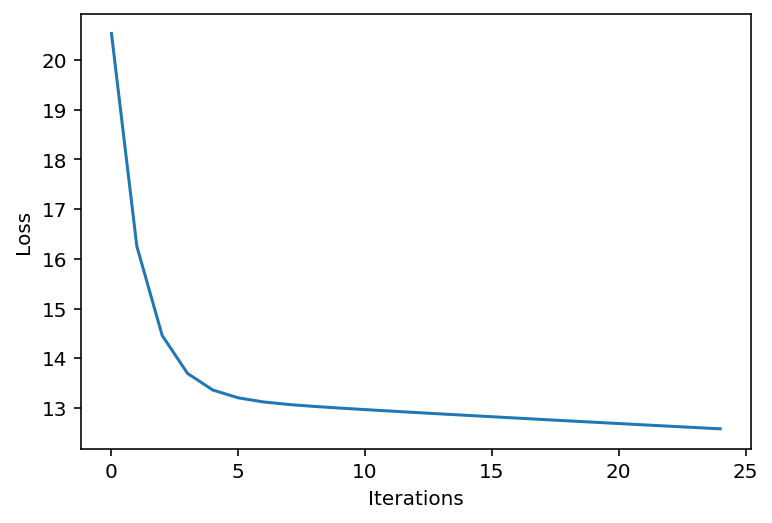

In [150]:
# gradient descent function definition
def grad_desc(X, y, w_init, tau, max_iter):

    L_iters = np.full([max_iter, 1], -1, dtype=np.float64) # record the loss values
    w_iters = np.full([max_iter, 2], -1, dtype=np.float64) # record the parameter values
    w = w_init # initialization
    
    for i in range(max_iter): # loop over the iterations
        
        y_pred = f_pred(X,w) # linear predicition function
        grad_f = grad_loss(y_pred,y,X) # gradient of the loss 
        w = w - tau * grad_f # update rule of gradient descent 
        L_iters[i] = loss_mse(y_pred,y) # save the current loss value 
        w_iters[i,:] = w # save the current w value 
        
    return w, L_iters, w_iters


# run gradient descent algorithm 
start = time.time()
w_init = [1, 1]
tau = 0.01
max_iter = 25

w, L_iters, w_iters = grad_desc(X,y,w_init,tau,max_iter)

print('Time=',time.time() - start) # plot the computational cost
print(L_iters[-1, 0]) # plot the last value of the loss
print(w_iters[[-1]]) # plot the last value of the parameter w

# plot
plt.figure(2)
plt.plot(L_iters) # plot the loss curve
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

## 7. Plot the linear prediction function
<hr>
$$
f_w(x) = w_0 + w_1 x
$$

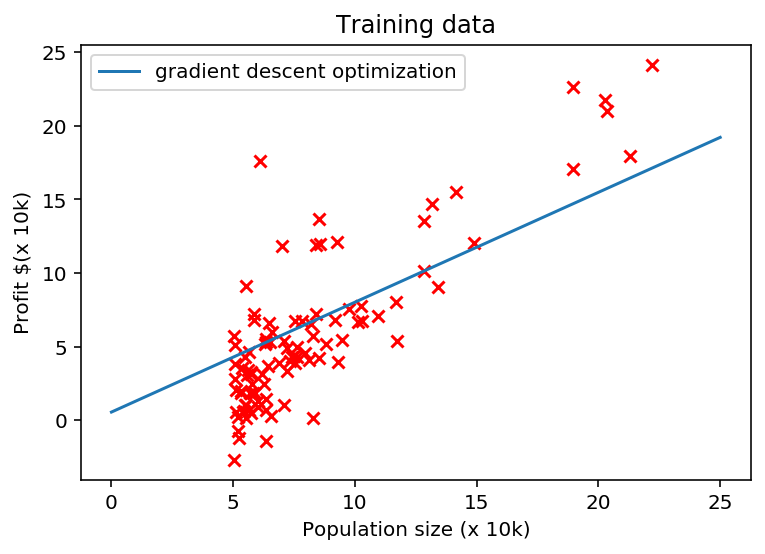

In [156]:
# linear regression model

w_0 = w_iters[(max_iter - 1), 0]
w_1 = w_iters[(max_iter - 1), 1]
x_pred = np.linspace(0,25,100) # define the domain of the prediction function
y_pred = w_0 + w_1 * x_pred # compute the prediction values within the given domain x_pred

# plot
plt.figure(3)
plt.scatter(x_train, y_train, marker="x", color="r")
plt.plot(x_pred, y_pred, label='gradient descent optimization')
plt.legend(loc='best')
plt.title('Training data')
plt.xlabel('Population size (x 10k)')
plt.ylabel('Profit $(x 10k)')
plt.show()

## 8. Comparison with Scikit-learn linear regression algorithm
<hr>
### Compare with the Scikit-learn solution

In [161]:
# run linear regression with scikit-learn
start = time.time()
lin_reg_sklearn = LinearRegression()
lin_reg_sklearn.fit(x_train.reshape(-1, 1), y_train) # learn the model parameters
print('Time=',time.time() - start)


# compute loss value
w_sklearn = np.zeros([2,1])
w_sklearn[0,0] = lin_reg_sklearn.intercept_
w_sklearn[1,0] = lin_reg_sklearn.coef_

print(w_sklearn)

y_skl_pred = f_pred(X, w_sklearn)
loss_sklearn = np.array([[loss_mse(np.ravel(y_skl_pred), y)]]) # compute the loss from the sklearn solution

print('loss sklearn=',loss_sklearn)
print('loss gradient descent=',L_iters[-1, 0]) 


# plot
x_pred_sklearn = np.linspace(0,25,100) # define the domain of the prediction function
y_pred_sklearn = w_sklearn[0,0] + w_sklearn[1,0] * x_pred_sklearn # prediction obtained by the sklearn library

plt.figure(3)

plt.scatter(x_train, y_train, marker="x", color="r")
plt.plot(x_pred, y_pred, label='gradient descent optimization')
plt.plot(x_train, y_skl_pred)
plt.legend(loc='best')
plt.title('Training data')
plt.xlabel('Population size (x 10k)')
plt.ylabel('Profit $(x 10k)')
plt.show()

Time= 0.0009987354278564453
[[-3.89578088]
 [ 1.19303364]]
-3.895780878311852 1.1930336441895937
loss sklearn= [[8.95394275]]
loss gradient descent= 12.579082939687492


## 9. Plot the loss surface, the contours of the loss and the gradient descent steps
<hr>

In [ ]:
# plot gradient descent 
def plot_gradient_descent(X,y,w_init,tau,max_iter):
    
    def f_pred(X,w):
        
        f = 
        
        return f
    
    def loss_mse(y_pred,y):
        
        loss = 
        
        return loss

    # gradient descent function definition
    def grad_desc(X, y, w_init, tau, max_iter):

        L_iters = # record the loss values
        w_iters = # record the parameter values
        w = w_init # initialization

        for i in range(max_iter): # loop over the iterations

            y_pred = # linear predicition function
            grad_f = # gradient of the loss 
            w = # update rule of gradient descent 
            L_iters[i] = # save the current loss value 
            w_iters[i,:] = # save the current w value 

        return w, L_iters, w_iters

    # run gradient descent
    w, L_iters, w_iters = grad_desc(X, y, w_init, tau, max_iter)
    
    # Create grid coordinates for plotting a range of L(w0,w1)-values
    B0 = np.linspace(-10, 10, 50)
    B1 = np.linspace(-1, 4, 50)
    
    xx, yy = np.meshgrid(B0, B1, indexing='xy')
    Z = np.zeros((B0.size,B1.size))  

    # Calculate loss values based on L(w0,w1)-values
    for (i,j),v in np.ndenumerate(Z):
        Z[i,j] = loss_mse( )

    # 3D visualization
    fig = plt.figure(figsize=(15,6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122, projection='3d')

    # Left plot
    CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
    ax1.scatter( )
    ax1.plot( )

    # Right plot
    ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
    ax2.set_zlabel('Loss $L(w_0,w_1)$')
    ax2.set_zlim(Z.min(),Z.max())

    # plot gradient descent
    Z2 = np.zeros([max_iter])
    
    for i in range(max_iter):
        w0 = 
        w1 = 
        Z2[i] = 
        
    ax2.plot( )
    ax2.scatter( )

    # settings common to both plots
    for ax in fig.axes:
        ax.set_xlabel(r'$w_0$', fontsize=17)
        ax.set_ylabel(r'$w_1$', fontsize=17)
    

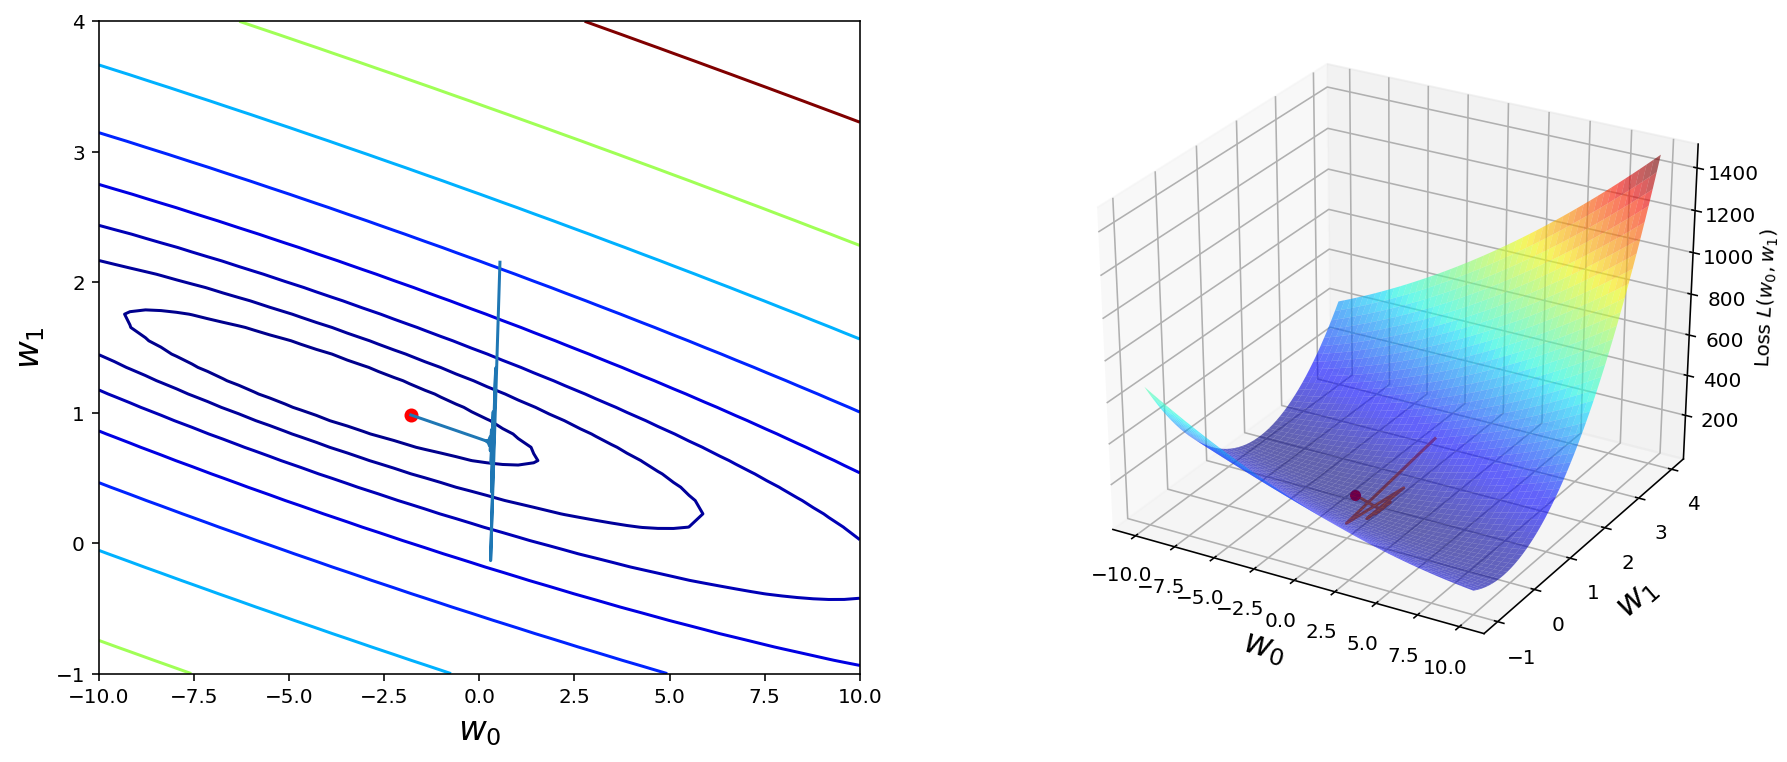

In [ ]:
# run plot_gradient_descent function
w_init = 
tau = 
max_iter = 

plot_gradient_descent(X,y,w_init,tau,max_iter) 

# Output results

## 1. Plot the training data (1pt)

![image.png](attachment:image.png)

## 2. Plot the loss curve in the course of gradient descent (2pt)

![image.png](attachment:image.png)

## 3. Plot the prediction function superimposed on the training data (2pt)

![image.png](attachment:image.png)

## 4. Plot the prediction functions obtained by both the Scikit-learn linear regression solution and the gradient descent superimposed on the training data (2pt)

![image.png](attachment:image.png)

## 5. Plot the loss surface (right) and the path of the gradient descent (2pt)

![image.png](attachment:image.png)

## 6. Plot the contour of the loss surface (left) and the path of the gradient descent (2pt)

![image.png](attachment:image.png)